In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [3]:
n_side = 512

# calculate $\ell$ and angle from a fixed physical comoving size

In [4]:
import numpy as np

from msfm.utils import files

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.cosmology.units as cu

In [5]:
def rad_to_arcmin(theta):
    return theta/np.pi*180*60

### define the fiducial cosmology (CosmoGrid)

In [7]:
# conf = files.load_config()
conf = files.load_config("/Users/arne/git/multiprobe-simulation-forward-model/configs/v11/extended.yaml")

# like https://cosmo-gitlab.phys.ethz.ch/jafluri/arne_handover/-/blob/main/map_projection/lensing_weights/run_UFalcon.py#L148
# and https://cosmo-gitlab.phys.ethz.ch/cosmo/UFalcon/-/blob/cosmogrid_des_y3/cosmogrid_des_y3/baryonification/utils.py#L22
fid_cosmo = FlatLambdaCDM(
    Om0=conf["analysis"]["fiducial"]["Om"],
    Ob0=conf["analysis"]["fiducial"]["Ob"],
    H0=conf["analysis"]["fiducial"]["H0"],
    Tcmb0=2.7255,
    Neff=3.046,
    m_nu=0.02*u.eV,
)

### do the per redshift bin calculation for metacal and maglim

In [9]:
galaxy_label = "metacal"

for scale in [4, 6, 8, 10, 12]:
# for scale in [30]:
    print(f"\nFor {galaxy_label}, the comoving transverse scale is {scale} Mpc/h")

    # calculate the mean redshift of the bins
    tomo_z, tomo_nz = files.load_redshift_distributions(galaxy_label, conf=conf)
    tomo_z_bar = []
    for i, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
        tomo_z_bar.append(np.sum(z*nz))

    # Arne version like https://msyriac.github.io/docs/physics/cosmo-sheet.html
    print("First method:")
    h = conf["analysis"]["fiducial"]["H0"]/100
    R_c = scale * u.Mpc / h

    theta = R_c/fid_cosmo.comoving_distance(tomo_z_bar)
    # ell = np.pi/theta
    ell = 1/theta

    # print(f"ell = {ell.value}")
    print(f"theta = {rad_to_arcmin(theta.value)} arcmin")

    # # Virginia version
    # print("Second method:")
    # H0 = conf["analysis"]["fiducial"]["H0"] * u.km/u.s/u.Mpc

    # d = scale * (u.Mpc/cu.littleh)    # little h units
    # dmpc = d.to(u.Mpc, cu.with_H0(H0))  # physical units
    # chi = fid_cosmo.comoving_distance(tomo_z_bar)

    # theta = dmpc/chi
    # # ell = np.pi/theta
    # ell = 1/theta

    # print(f"ell = {ell.value}")
    # print(f"theta = {rad_to_arcmin(np.array(theta.value))} arcmin")

    # # astropy builtin
    # print("Third method:")
    # print(tomo_z_bar)
    # theta = fid_cosmo.arcsec_per_kpc_comoving(tomo_z_bar)   # arcsec
    # theta_deg = theta * 10**3 * dmpc/3600   # degrees
    # ell = 180.0/theta_deg

    # print(f"ell = {ell.value}")
    # print(f"theta = {theta_deg.value*60} arcmin")


For metacal, the comoving transverse scale is 4 Mpc/h
First method:
theta = [14.75582447 10.06556388  7.4939301   6.28738821] arcmin

For metacal, the comoving transverse scale is 6 Mpc/h
First method:
theta = [22.13373671 15.09834582 11.24089514  9.43108231] arcmin

For metacal, the comoving transverse scale is 8 Mpc/h
First method:
theta = [29.51164894 20.13112776 14.98786019 12.57477642] arcmin

For metacal, the comoving transverse scale is 10 Mpc/h
First method:
theta = [36.88956118 25.1639097  18.73482524 15.71847052] arcmin

For metacal, the comoving transverse scale is 12 Mpc/h
First method:
theta = [44.26747341 30.19669164 22.48179029 18.86216463] arcmin


In [9]:
for galaxy_label, scale in zip(
    ["metacal", "metacal", "metacal", "metacal", "maglim", "maglim", "maglim", "maglim", "maglim"], [4, 6, 8, 10, 16, 20, 24, 28, 32]
):
    print(f"\nFor {galaxy_label}, the comoving transverse scale is {scale} Mpc/h")

    # calculate the mean redshift of the bins
    tomo_z, tomo_nz = files.load_redshift_distributions(galaxy_label, conf)
    tomo_z_bar = []
    for i, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
        tomo_z_bar.append(np.sum(z * nz))

    # Arne version like https://msyriac.github.io/docs/physics/cosmo-sheet.html
    # print("First method:")
    h = conf["analysis"]["fiducial"]["H0"] / 100
    R_c = scale * u.Mpc / h

    theta = R_c / fid_cosmo.comoving_distance(tomo_z_bar)
    # ell = np.pi/theta
    ell = 1 / theta

    # print(f"ell = {ell.value}")
    print(f"theta = {rad_to_arcmin(theta.value)} arcmin")

    # # Virginia version
    # print("Second method:")
    # H0 = conf["analysis"]["fiducial"]["H0"] * u.km/u.s/u.Mpc

    # d = scale * (u.Mpc/cu.littleh)    # little h units
    # dmpc = d.to(u.Mpc, cu.with_H0(H0))  # physical units
    # chi = fid_cosmo.comoving_distance(tomo_z_bar)

    # theta = dmpc/chi
    # # ell = np.pi/theta
    # ell = 1/theta

    # print(f"ell = {ell.value}")
    # print(f"theta = {rad_to_arcmin(np.array(theta.value))} arcmin")

    # # astropy builtin
    # print("Third method:")
    # print(tomo_z_bar)
    # theta = fid_cosmo.arcsec_per_kpc_comoving(tomo_z_bar)   # arcsec
    # theta_deg = theta * 10**3 * dmpc/3600   # degrees
    # ell = 180.0/theta_deg

    # print(f"ell = {ell.value}")
    # print(f"theta = {theta_deg.value*60} arcmin")


For metacal, the comoving transverse scale is 4 Mpc/h
theta = [14.75582447 10.06556388  7.4939301   6.28738821] arcmin

For metacal, the comoving transverse scale is 6 Mpc/h
theta = [22.13373671 15.09834582 11.24089514  9.43108231] arcmin

For metacal, the comoving transverse scale is 8 Mpc/h
theta = [29.51164894 20.13112776 14.98786019 12.57477642] arcmin

For metacal, the comoving transverse scale is 10 Mpc/h
theta = [36.88956118 25.1639097  18.73482524 15.71847052] arcmin

For maglim, the comoving transverse scale is 16 Mpc/h
theta = [65.10123532 44.45232207 34.06191548 28.52162382] arcmin

For maglim, the comoving transverse scale is 20 Mpc/h
theta = [81.37654415 55.56540258 42.57739435 35.65202978] arcmin

For maglim, the comoving transverse scale is 24 Mpc/h
theta = [97.65185298 66.6784831  51.09287323 42.78243574] arcmin

For maglim, the comoving transverse scale is 28 Mpc/h
theta = [113.92716181  77.79156362  59.6083521   49.91284169] arcmin

For maglim, the comoving transvers

In [7]:
for galaxy_label, scale in zip(["metacal", "maglim"], [4, 8]):
    print(f"\nFor {galaxy_label}, the comoving transverse scale is {scale} Mpc/h")

    # calculate the mean redshift of the bins
    tomo_z, tomo_nz = files.load_redshift_distributions(galaxy_label)
    tomo_z_bar = []
    for i, (z, nz) in enumerate(zip(tomo_z, tomo_nz)):
        tomo_z_bar.append(np.sum(z*nz))

    # Arne version like https://msyriac.github.io/docs/physics/cosmo-sheet.html
    print("First method:")
    h = conf["analysis"]["fiducial"]["H0"]/100
    R_c = scale * u.Mpc / h

    theta = R_c/fid_cosmo.comoving_distance(tomo_z_bar)
    # ell = np.pi/theta
    ell = 1/theta

    print(f"ell = {ell.value}")
    print(f"theta = {rad_to_arcmin(theta.value)} arcmin")

    # # Virginia version
    # print("Second method:")
    # H0 = conf["analysis"]["fiducial"]["H0"] * u.km/u.s/u.Mpc

    # d = scale * (u.Mpc/cu.littleh)    # little h units
    # dmpc = d.to(u.Mpc, cu.with_H0(H0))  # physical units
    # chi = fid_cosmo.comoving_distance(tomo_z_bar)

    # theta = dmpc/chi
    # # ell = np.pi/theta
    # ell = 1/theta

    # print(f"ell = {ell.value}")
    # print(f"theta = {rad_to_arcmin(np.array(theta.value))} arcmin")

    # # astropy builtin
    # print("Third method:")
    # print(tomo_z_bar)
    # theta = fid_cosmo.arcsec_per_kpc_comoving(tomo_z_bar)   # arcsec
    # theta_deg = theta * 10**3 * dmpc/3600   # degrees
    # ell = 180.0/theta_deg

    # print(f"ell = {ell.value}")
    # print(f"theta = {theta_deg.value*60} arcmin")


For metacal, the comoving transverse scale is 1 Mpc/h
First method:
ell = [ 931.90232176 1366.14175281 1834.95000723 2187.07460479]
theta = [3.68895612 2.51639097 1.87348252 1.57184705] arcmin

For maglim, the comoving transverse scale is 2 Mpc/h
First method:
ell = [422.44934419 618.68475903 807.41126199 964.2499437 ]
theta = [8.13765441 5.55654026 4.25773944 3.56520298] arcmin


# plotting

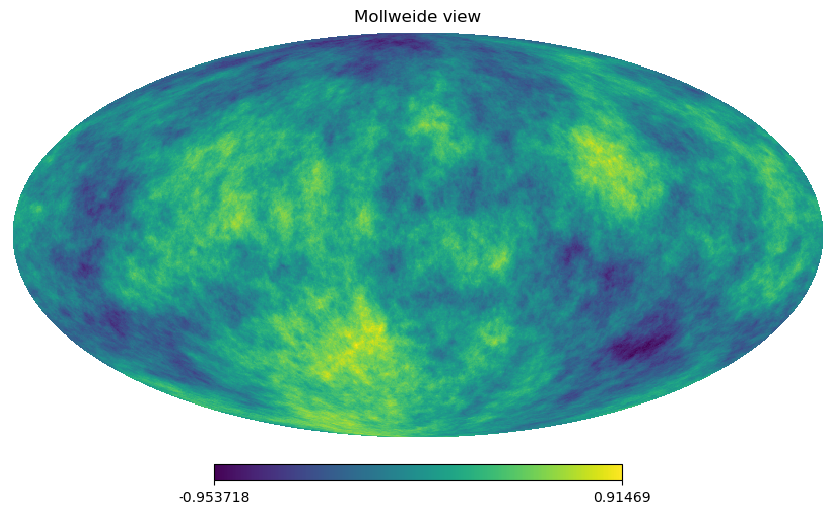

In [22]:
# we start be generating a random map
np.random.seed(11)
Cl = np.arange(1, 1001)**-3.
base_map = hp.synfast(cls=Cl, nside=n_side)
base_map -= np.mean(base_map)

z_min = np.min(base_map)
z_max = np.max(base_map)

# plot
hp.mollview(base_map, min=z_min, max=z_max)

# Gaussian smoothing vs alm cut

theta = 0.1 radian, theta = 343.77467707849394 arcmin, ell = 31.41592653589793


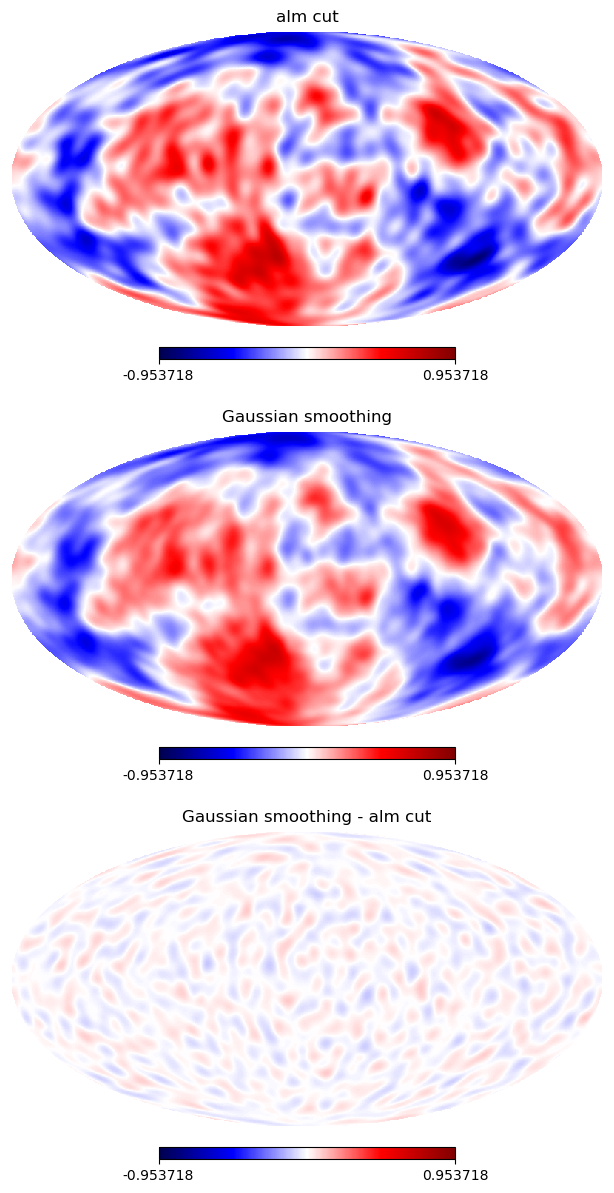

In [48]:
vmax = np.max(np.abs(base_map))
vmin = - vmax

theta_max = 0.1
l_max = np.pi/theta_max
# l_max = 1/theta_max
print(f"theta = {theta_max} radian, theta = {theta_max*180/np.pi*60} arcmin, ell = {l_max}")

# smoothing
smoothed = hp.smoothing(base_map, fwhm=theta_max)

# alm cut
n_side = 512
l = hp.Alm.getlm(3 * n_side - 1)[0]
alm = hp.map2alm(base_map, use_pixel_weights=True)
alm[l_max < l] = 0.0
cut = hp.alm2map(alm, n_side)

# plot
plt.figure(figsize=(6,12))
hp.mollview(smoothed, title="Gaussian smoothing", min=vmin, max=vmax, sub=312, cmap="seismic")
hp.mollview(cut, title="alm cut", min=vmin, max=vmax, sub=311, cmap="seismic")
hp.mollview(smoothed - cut, title="Gaussian smoothing - alm cut", min=vmin, max=vmax, sub=313, cmap="seismic")

# both scale cuts

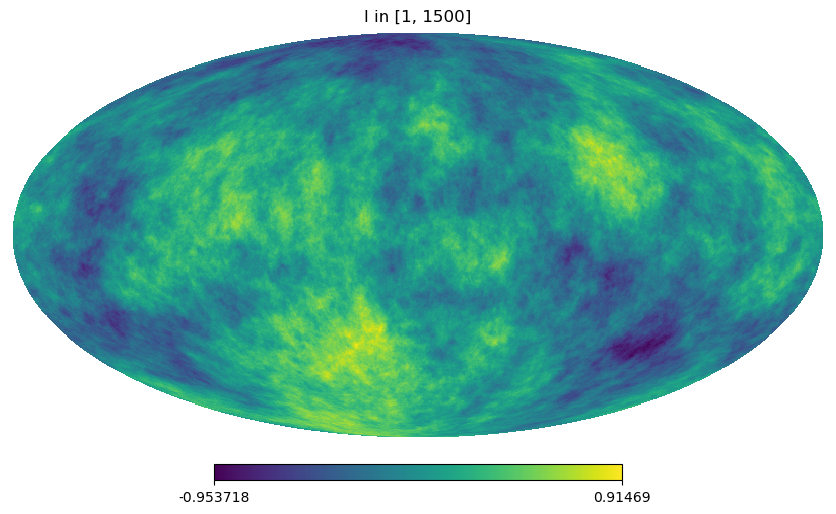

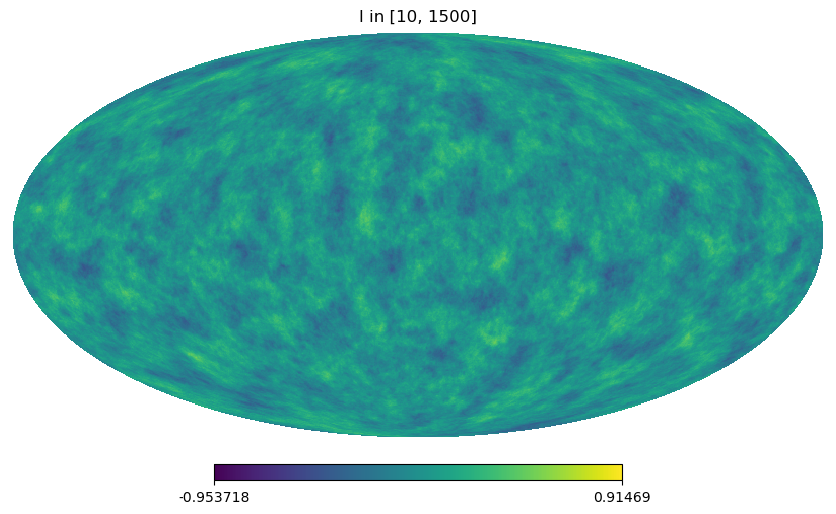

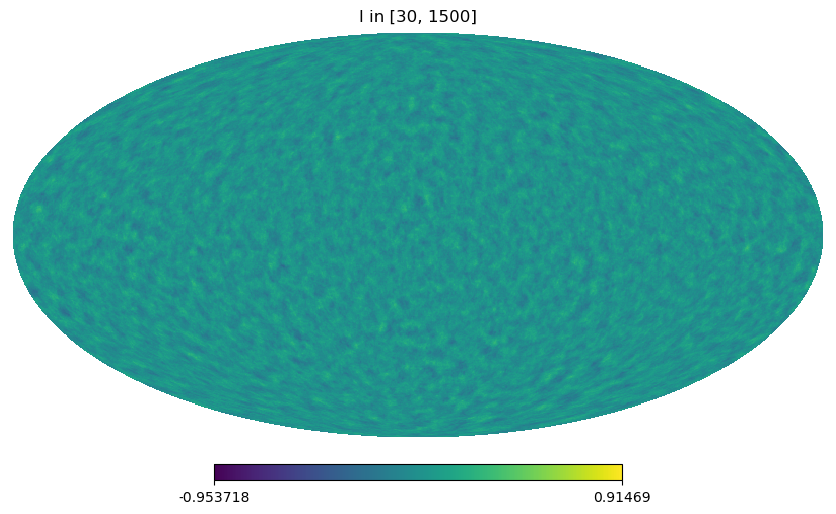

In [11]:
l_min_list = [1, 10, 30]
l_max_dict = 1500

for l_min in l_min_list:
    alm = hp.map2alm(
        base_map,
        use_pixel_weights=True,
        lmax=l_max_dict
    )
    l = hp.Alm.getlm(l_max_dict)[0]
    alm[l < l_min] = 0

    new_map = hp.alm2map(alm, n_side, lmax=l_max_dict)

    hp.mollview(new_map, min=z_min, max=z_max, title=f"l in [{l_min}, {l_max_dict}]")

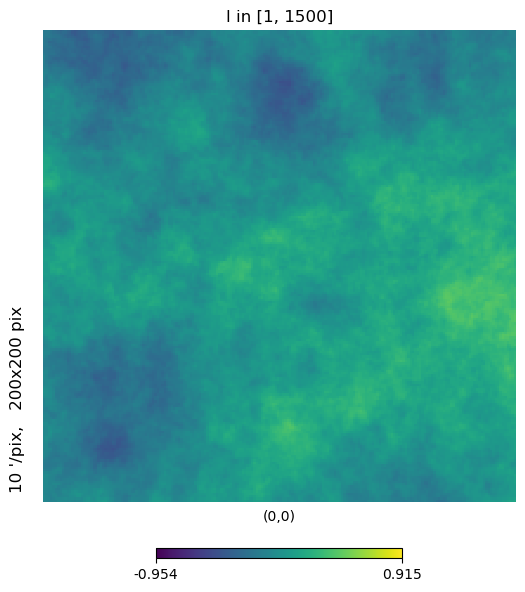

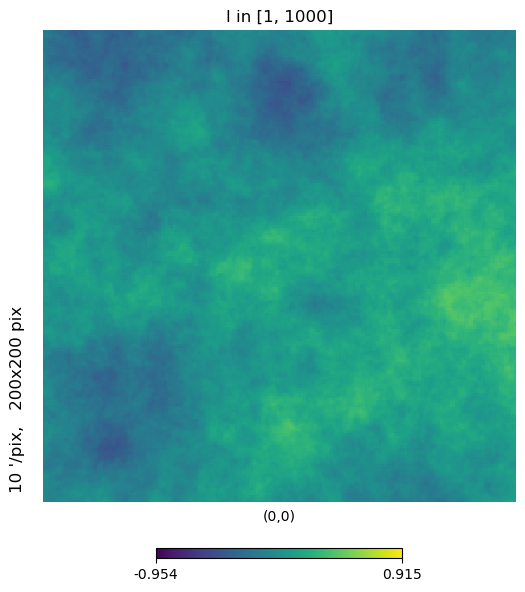

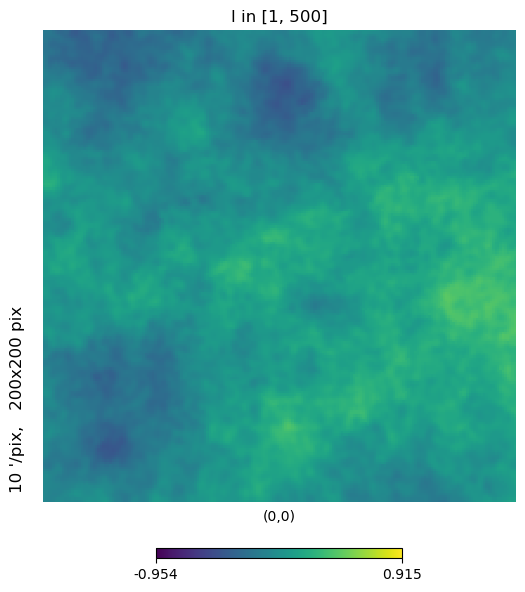

In [12]:
l_min = 1
l_max_list = [1500, 1000, 500]

for l_max_dict in l_max_list:
    alm = hp.map2alm(
        base_map,
        use_pixel_weights=True,
        lmax=l_max_dict
    )
    l = hp.Alm.getlm(l_max_dict)[0]
    alm[l < l_min] = 0

    new_map = hp.alm2map(alm, n_side, lmax=l_max_dict)

    hp.gnomview(new_map, min=z_min, max=z_max, title=f"l in [{l_min}, {l_max_dict}]", reso=10)